<h1 style="text-align:center;">Análise de Dados do Quadro de Funcionários para Tomada de Decisões Estratégicas de RH</h1>


**Problema**: O problema a ser abordado neste projeto é entender os fatores que afetam a retenção de funcionários em uma empresa, considerando variáveis como educação, tempo de serviço, localização, nível salarial, idade, gênero e experiência na área atual.

**Objetivo da Análise**: O objetivo desta análise é identificar tendências e padrões nos dados dos funcionários, visando responder a perguntas específicas, como a distribuição das qualificações educacionais, variações no tempo de serviço em diferentes cidades, a existência de correlações entre o nível salarial e a experiência atual, entender a distribuição de gênero na força de trabalho e analisar os padrões de comportamento relacionados a licenças dos funcionários. Esses insights podem auxiliar na tomada de decisões estratégicas, como estrutura salarial, políticas de diversidade e inclusão, e medidas para melhorar a retenção de funcionários.







**Contexto:**
Este conjunto de dados contém informações sobre os funcionários de uma empresa, incluindo sua formação educacional, histórico de trabalho, características demográficas e fatores relacionados ao emprego. Ele foi anonimizado para proteger a privacidade, enquanto ainda fornece informações valiosas sobre a força de trabalho.

**Colunas:**
- Educação: As qualificações educacionais dos funcionários, incluindo grau, instituição e área de estudo.
- Ano de Ingresso: O ano em que cada funcionário ingressou na empresa, indicando seu tempo de serviço.
- Cidade: A localização ou cidade onde cada funcionário está baseado ou trabalha.
- Nível Salarial: Categorização dos funcionários em diferentes níveis salariais.
- Idade: A idade de cada funcionário, fornecendo informações demográficas.
- Gênero: Identidade de gênero dos funcionários, promovendo a análise de diversidade.
- Já Ficou sem Atribuição: Indica se um funcionário já ficou temporariamente sem atribuição de trabalho.
- Experiência no Domínio Atual: O número de anos de experiência que os funcionários têm em sua área atual.
- Sair ou Não: Uma coluna alvo.

**Uso:**
Este conjunto de dados pode ser utilizado para diversas análises de RH e relacionadas à força de trabalho, incluindo retenção de funcionários, avaliações da estrutura salarial, estudos de diversidade e inclusão, e análises de padrões de licenças. Pesquisadores, analistas de dados e profissionais de RH podem obter insights valiosos a partir deste conjunto de dados.

**Possíveis Questões de Pesquisa:**
1. Qual é a distribuição das qualificações educacionais entre os funcionários?
2. Como o tempo de serviço (Ano de Ingresso) varia entre diferentes cidades?
3. Existe uma correlação entre o Nível Salarial e a Experiência no Domínio Atual?
4. Qual é a distribuição de gênero dentro da força de trabalho?
5. Existem padrões nos comportamentos de licenças dos funcionários?

**Agradecimentos:**
Gostaríamos de agradecer às contribuições do nosso departamento de RH por disponibilizar este conjunto de dados para fins de pesquisa e análise.


**Fonte:** https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset/data

In [1]:
# Importando os pacotes que serão usados 
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Employee.csv')

In [3]:
df.head(3)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0


In [4]:
# Verificando se há valores nulos no conjunto de dados 
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

Com a ausência de valores nulos indica que o dataset está completo e não há informações faltando. Isso é fundamental para garantir a integridade dos dados, pois você tem todas as informações que esperaria encontrar, além de sugerir que o dataset foi bem coletado e limpo. Isso pode ser um indicativo de boa qualidade dos dados, pois não há necessidade de preencher lacunas ou realizar imputações de dados ausentes. Quando não há valores nulos, a análise dos dados se torna mais direta e simples. Não é necessário lidar com tratamento de valores ausentes, o que economiza tempo e recursos e as conclusões tiradas a partir de um dataset sem valores nulos são mais confiáveis, pois não há incertezas relacionadas à falta de dados. Isso é particularmente importante em análises críticas ou tomadas de decisão.

In [5]:
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

Com base na contagem de valores únicos em cada coluna apresentada:

1. **Education**: Existem 3 níveis únicos de educação entre os funcionários. Isso pode ser útil para entender a diversidade educacional da força de trabalho.

2. **JoiningYear**: Há 7 anos únicos de admissão na empresa. Isso pode fornecer insights sobre a distribuição do tempo de serviço dos funcionários.

3. **City**: Existem 3 cidades únicas onde os funcionários estão baseados ou trabalham. Isso pode ser relevante para análises geográficas ou de localização.

3. **PaymentTier**: Há 3 categorias salariais distintas. Isso pode ser útil para avaliar a estrutura salarial da empresa.

4. **Age**: Existem 20 idades únicas entre os funcionários. Isso oferece uma visão da diversidade etária da força de trabalho.

5. **Gender**: Há 2 valores únicos para o gênero dos funcionários. Isso pode ser relevante para análises de diversidade de gênero.

6. **EverBenched**: Existem 2 valores únicos para indicar se um funcionário já ficou temporariamente sem trabalho atribuído. Isso pode ser usado para avaliar a frequência desse cenário.

7. **ExperienceInCurrentDomain**: Há 8 valores únicos para a experiência dos funcionários em seu campo atual. Isso pode ser relevante para entender a experiência da equipe em diferentes áreas.

8. **LeaveOrNot**: Existem 2 valores únicos para a coluna de destino, que pode indicar se um funcionário tirou licença ou não. Isso é importante para análises relacionadas a licenças e ausências

<div style="text-align: center;">
    <h2>Análise Exploratória de Dados</h2>
    <p>É um passo fundamental ao trabalhar com conjuntos de dados, pois permite que os analistas entendam melhor os dados, identifiquem tendências, anomalias e insights iniciais. A análise exploratória permitirá que você obtenha insights iniciais sobre o dataset, identifique áreas de interesse e formule perguntas mais específicas para análises subsequentes. É um passo crucial no processo de exploração de dados e na formulação de estratégias para abordar os objetivos de análise relacionados aos recursos humanos e à força de trabalho da empresa. E para isso vamos utilizar gráficos pois eles contribuem para uma compreensão mais profunda dos dados além de serem uma ferramenta eficaz para comunicar resultados e insights a outras partes interessadas ou membros da equipe que podem não ter conhecimento técnico avançado. Gráficos podem simplificar conceitos complexos</p>

<div style="text-align: center;">
    <h2>Análise de Váriaveis Categóricas</h2>
    
A Análise de Variáveis Categóricas é uma parte fundamental da análise de dados que se concentra em compreender e extrair informações de variáveis que representam categorias, rótulos ou grupos discretos, em oposição a variáveis numéricas contínuas. Variáveis categóricas são aquelas que possuem um conjunto finito de valores ou níveis, e elas desempenham um papel crucial em diversas áreas da ciência de dados, pesquisa social e análise estatística.

A importância da Análise de Variáveis Categóricas reside em vários aspectos:

1. **Compreensão da Distribuição**: Ela permite entender como as categorias estão distribuídas nos dados. Isso é fundamental para obter insights sobre a composição e a frequência de diferentes grupos.

2. **Tomada de Decisões**: Ajuda na tomada de decisões informadas em uma variedade de domínios. Por exemplo, em marketing, a análise de preferências de produtos com base em categorias de clientes pode orientar estratégias de vendas.

3. **Segmentação de Mercado**: Permite segmentar o mercado com base em variáveis demográficas, como idade, gênero, localização, para atender melhor às necessidades dos clientes.

4. **Avaliação de Impacto**: É útil para avaliar o impacto de variáveis categóricas em um resultado desejado, como determinar a influência de uma categoria de tratamento em um experimento.

5. **Análise de Associação**: Ajuda a identificar associações entre categorias, o que pode ser útil para identificar tendências e relações entre variáveis.

6. **Modelagem Estatística**: Muitos modelos estatísticos e algoritmos de aprendizado de máquina trabalham com variáveis categóricas. A análise adequada dessas variáveis é fundamental para modelagem precisa.

7. **Política e Planejamento**: Em políticas públicas e planejamento urbano, a análise de categorias demográficas pode ajudar a moldar políticas e alocação de recursos.

8. **Pesquisa Social e de Opinião**: Em pesquisas sociais, a análise de variáveis categóricas, como opiniões políticas, preferências de estilo de vida, etc., é essencial para entender tendências e padrões na sociedade.

9. **Controle de Qualidade**: Em processos de controle de qualidade, a análise de categorias pode ajudar a identificar problemas e melhorar a qualidade de produtos ou serviços.

In [6]:
# Importando os pacotes que serão úteis para fazer a AED
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq

Text(0.5, 0, 'Quantidade de Funcionários')

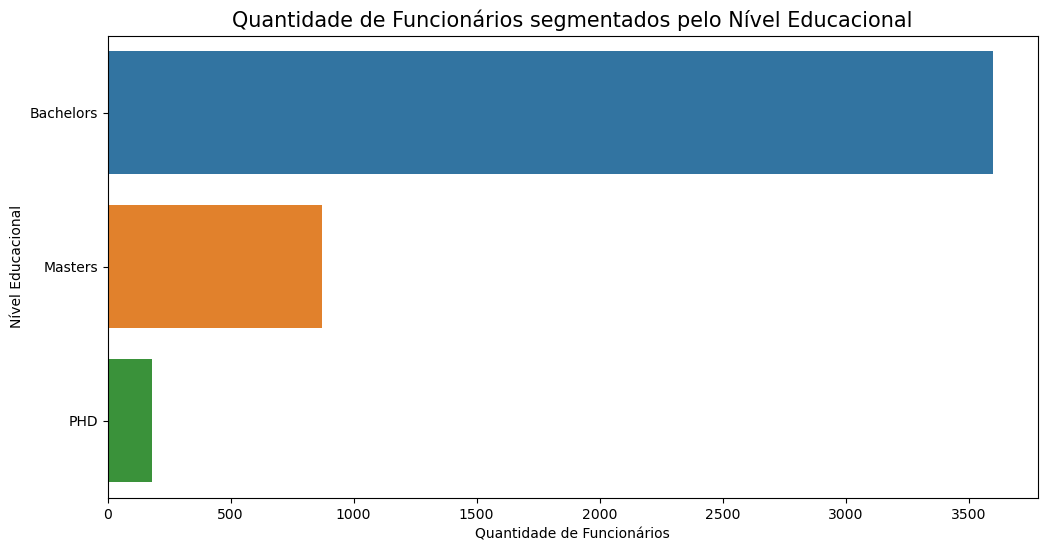

In [7]:
plt.figure(figsize=(12,6))
plt.title('Quantidade de Funcionários segmentados pelo Nível Educacional', fontsize= 15)
sns.countplot(y = df.Education)
plt.ylabel('Nível Educacional')
plt.xlabel('Quantidade de Funcionários')

Com base nas informações fornecidas sobre a distribuição de níveis de educação,  chegamos às seguintes conclusões e insights:

**Predominância de Nível "Bachelors"** : A maioria esmagadora dos funcionários, ou seja, 3601 de um total de 4653, possui um nível de educação de "Bachelors". Isso sugere que a empresa provavelmente contrata a maioria de seus funcionários com esse nível educacional. Pode ser o requisito mínimo para muitas das funções na empresa.

**Presença Significativa de Mestrados**: A presença de 873 funcionários com nível de educação "Masters" indica que a empresa também valoriza funcionários com qualificações educacionais mais avançadas. Esses funcionários podem ser envolvidos em funções que exigem conhecimentos mais especializados ou avançados.

**Menos Funcionários com PhD**: Com apenas 179 funcionários com um nível de educação "PhD", podemos inferir que a empresa não requer esse nível de educação para a maioria das funções ou que pode haver menos disponibilidade de candidatos com esse nível educacional. Funcionários com PhD podem estar envolvidos em funções altamente especializadas ou de pesquisa.

**Diversidade Educacional**: A presença de funcionários em diferentes níveis educacionais pode indicar uma diversidade de conhecimento e perspectivas dentro da empresa, o que pode ser benéfico para a resolução de problemas e inovação.

**Potencial para Desenvolvimento Interno**: A empresa pode ter programas de desenvolvimento interno que incentivam os funcionários a progredir em suas qualificações educacionais, passando de "Bachelors" para "Masters" ou "PhD".

**Implicações para Políticas de Recursos Humanos**: A distribuição de níveis educacionais pode ter implicações nas políticas de recursos humanos da empresa, como planos de carreira, treinamento e desenvolvimento, bem como estratégias de recrutamento.

**Perfil da Força de Trabalho**: Essa distribuição também pode fornecer insights sobre o perfil da força de trabalho, incluindo o equilíbrio entre funcionários juniores e seniores, bem como a diversidade de habilidades e conhecimentos disponíveis.

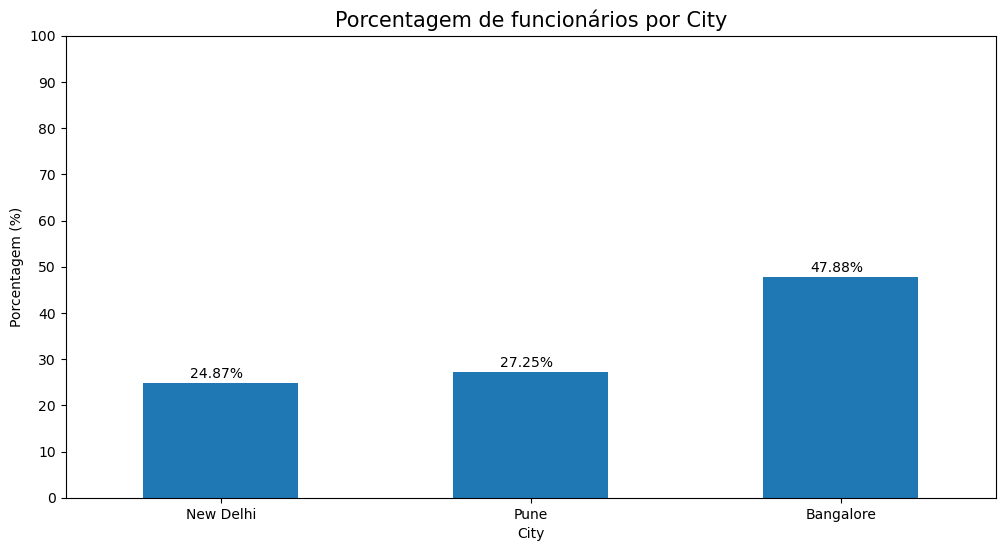

In [8]:
plt.figure(figsize=(12,6))
plt.title("Porcentagem de funcionários por City", fontsize = 15)
plt.xlabel('City')
plt.ylabel('Porcentagem (%)')

ax = (df.City.value_counts()/len(df)*100).sort_values().plot(kind = 'bar', rot = 0)
ax.set_yticks(np.arange(0,110,10))

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

**Predominância de Bangalore**: A cidade de Bangalore tem o maior número de funcionários, que são quase 50% do total. Isso sugere que a empresa tem uma presença significativa em Bangalore que é onde a maioria dos funcionários está localizada.

**Pune em Segundo Lugar**: Pune é a segunda cidade com o maior número de funcionários, com 27% do total. Embora tenha menos funcionários do que Bangalore, ainda é uma cidade importante para a empresa e abriga uma parte substancial da força de trabalho.

**Presença em New Delhi**: New Delhi é a terceira cidade em termos de número de funcionários, com 1157. Isso indica que a empresa também tem uma presença significativa na capital da Índia, embora seja um pouco menor em comparação com Bangalore e Pune.

**Diversidade Geográfica**: A distribuição de funcionários em diferentes cidades pode indicar uma diversidade geográfica na força de trabalho da empresa. Isso pode ser benéfico para a empresa, pois permite acessar talentos de diferentes regiões e culturas.

**Implicações para Estratégias de Recursos Humanos**: A distribuição geográfica pode ter implicações nas estratégias de recursos humanos da empresa, como estratégias de recrutamento, gestão de talentos e políticas de mobilidade. Por exemplo, a empresa pode precisar adaptar suas políticas para atender às necessidades específicas de cada localidade.

**Potencial para Escritórios Regionais**: A presença substancial em várias cidades pode indicar a possibilidade de a empresa ter escritórios regionais ou filiais em cada localidade para atender às necessidades locais.

**Avaliação de Custos e Benefícios**: Uma análise mais aprofundada poderia avaliar os custos e benefícios de manter escritórios em diferentes cidades em termos de eficiência operacional, custos imobiliários e acesso a talentos.



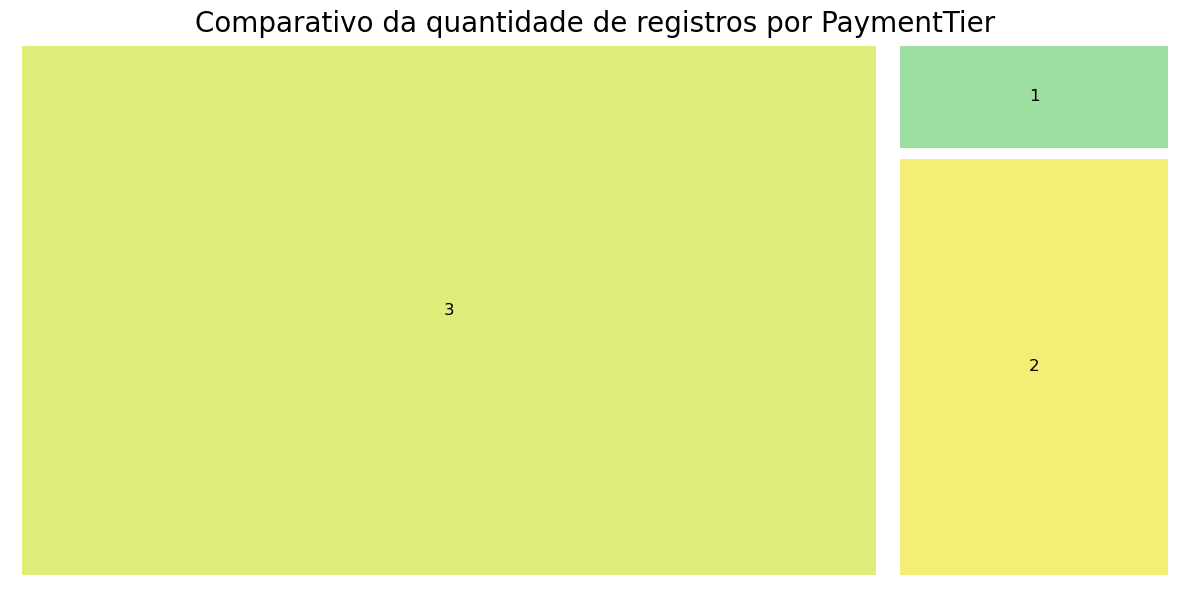

In [9]:
plt.figure(figsize=(12,6))

# Treemap e suas configurações
sq.plot(sizes=df.PaymentTier.value_counts(), label= df.PaymentTier.value_counts().index,
       pad = True, alpha = .6,text_kwargs={'fontsize': 12});

# Adicionando um título
plt.title('Comparativo da quantidade de registros por PaymentTier', fontsize=20)

# Removendo os eixos
plt.axis('off');

# Ajustando o gráfico
plt.tight_layout()

**Predominância do Nível 3**: A maioria dos funcionários está no nível de PaymentTier 3. Isso sugere que o nível 3 é o mais comum entre os funcionários da empresa. Pode ser o nível padrão de pagamento ou o mais aplicável à maioria das funções na empresa.

**Presença Significativa do Nível 2**: O nível 2 de PaymentTier também tem uma presença substancial. Isso indica que há uma parcela significativa de funcionários em um nível de pagamento intermediário. Pode ser que esses funcionários tenham funções específicas que justifiquem esse nível de pagamento.

**Nível 1 Menos Comum**: O nível 1 de PaymentTier é o menos comum. Isso sugere que há menos funcionários na empresa que se encaixam nos critérios para esse nível de pagamento. Pode ser reservado para funções de alto nível ou executivas.

**Diversidade de Níveis de Pagamento**: A presença de diferentes níveis de PaymentTier pode indicar uma diversidade na estrutura salarial da empresa. Isso pode ser resultado de políticas de remuneração diferenciadas, baseadas em função, senioridade ou outros fatores.

**Implicações para Políticas de Remuneração**: A distribuição dos níveis de pagamento pode ter implicações nas políticas de remuneração da empresa. Por exemplo, pode indicar a necessidade de revisar e ajustar as políticas de remuneração para garantir que elas estejam alinhadas com os objetivos da empresa e com as expectativas dos funcionários.

**Estratégias de Retenção de Funcionários**: A empresa pode usar essa distribuição para desenvolver estratégias de retenção de funcionários, garantindo que os níveis de pagamento sejam competitivos e justos em relação ao mercado e às expectativas dos funcionários.

**Análise de Custos e Benefícios**: Uma análise mais aprofundada pode avaliar os custos e benefícios associados a cada nível de pagamento em termos de retenção de talentos, satisfação dos funcionários e eficácia organizacional.


([<matplotlib.patches.Wedge at 0x14614528ac0>,
 [Text(-0.3301564924384111, 1.049283894139601, 'Male'),
  Text(0.33015639419736137, -1.0492839250510784, 'Female')],
 [Text(-0.18008535951186058, 0.5723366695306914, '59.7%'),
  Text(0.18008530592583344, -0.5723366863914972, '40.3%')])

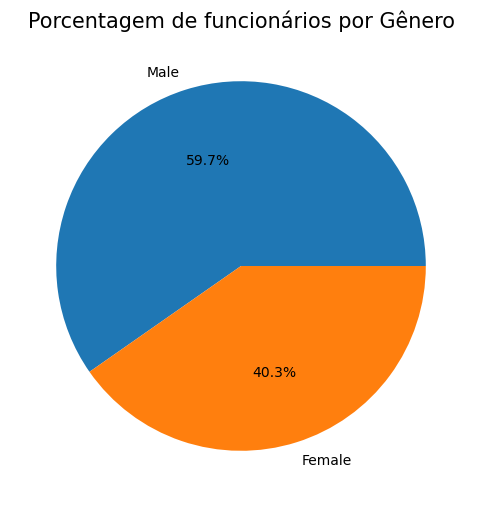

In [10]:
plt.figure(figsize=(12,6))
plt.title("Porcentagem de funcionários por Gênero", fontsize = 15)

plt.pie(x=df.Gender.value_counts(), labels = df.Gender.value_counts().index, autopct = '%1.1f%%')

**Desigualdade de Gênero**: A distribuição dos gêneros indica que há uma desigualdade de gênero na força de trabalho da empresa. O número de funcionários do sexo masculino (Male) é significativamente maior do que o número de funcionários do sexo feminino (Female).

**Diversidade de Gênero**: Embora haja uma desigualdade na distribuição de gêneros, é importante reconhecer que a empresa possui funcionários de ambos os sexos. Isso é um sinal de diversidade de gênero na empresa, o que pode ser valorizado em muitas organizações.

**Potencial para Análises de Diversidade**: A distribuição de gênero pode servir como ponto de partida para análises mais aprofundadas de diversidade de gênero na empresa. Isso pode incluir avaliações de equidade salarial, representação em cargos de liderança e políticas de inclusão de gênero.

**Estratégias de Recursos Humanos**: A empresa pode considerar a implementação de estratégias de recursos humanos voltadas para a promoção da igualdade de gênero, como programas de mentorias para mulheres, políticas de equidade salarial e programas de conscientização.

**Avaliação do Ambiente de Trabalho**: A empresa pode realizar pesquisas de clima organizacional para avaliar o ambiente de trabalho e garantir que seja inclusivo e acolhedor para funcionários de todos os gêneros.

**Atração de Talentos**: A distribuição de gênero também pode afetar a capacidade da empresa de atrair talentos. Uma estratégia de recrutamento inclusiva pode ser importante para atrair candidatos de diferentes gêneros.

**Objetivos de Diversidade**: Com base nessa distribuição, a empresa pode estabelecer metas e objetivos de diversidade de gênero para trabalhar na redução da desigualdade e promoção da inclusão.

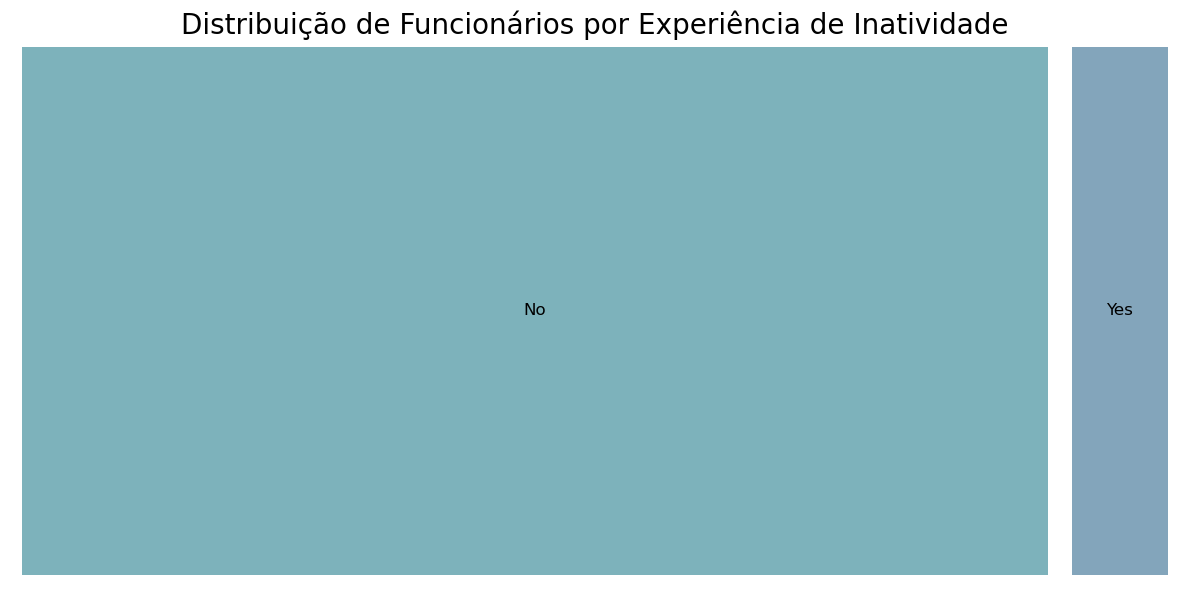

In [11]:
plt.figure(figsize=(12,6))

# Montando Treemap
sq.plot(sizes = df.EverBenched.value_counts(), label=df.EverBenched.value_counts().index,
       pad = True, alpha = .6,text_kwargs={'fontsize': 12})

#Título
plt.title('Distribuição de Funcionários por Experiência de Inatividade', fontsize = 20)

# Removendo os eixos
plt.axis('off');

# Ajustando o gráfico
plt.tight_layout()

**Estabilidade no Trabalho**: A grande maioria dos funcionários nunca passou por períodos de inatividade temporária, o que pode indicar estabilidade no trabalho e uma empresa que é eficaz em manter seus funcionários ocupados com tarefas.

**Gerenciamento de Recursos**: Pode ser um sinal de que a empresa é eficaz no gerenciamento de recursos e na atribuição de tarefas de forma consistente para evitar períodos de inatividade.

**Impacto em Recursos Humanos**: Aqueles funcionários que responderam "Yes" indicam que já experimentaram períodos de inatividade. Isso pode ser relevante para a equipe de recursos humanos, pois eles podem querer entender as razões por trás desses períodos e procurar maneiras de mitigar ou evitar tais situações no futuro.

**Eficiência Operacional**: A análise desses casos em que os funcionários responderam "Yes" pode levar a melhorias na eficiência operacional e na alocação de recursos.

**Apoio aos Funcionários**: É importante oferecer apoio e oportunidades de desenvolvimento para aqueles funcionários que podem ter experimentado períodos de inatividade para mantê-los envolvidos e produtivos.

Em resumo, essa distribuição pode fornecer informações sobre a eficiência operacional da empresa e também pode ser usada para identificar áreas em que a gestão de recursos humanos pode fazer melhorias para garantir que os funcionários estejam ocupados e engajados em seus trabalhos.

<div style="text-align: center;">
    <h2>Análise de Váriaveis Contínuas</h2>
    
A Análise de Variáveis Contínuas é uma parte essencial da análise de dados que se concentra na investigação, descrição e interpretação de dados numéricos ou quantitativos. Essas variáveis podem assumir uma ampla gama de valores dentro de um intervalo, e não são restritas a valores específicos, como é o caso das variáveis categóricas. A análise de variáveis contínuas é fundamental em diversas disciplinas, incluindo estatística, ciência de dados, pesquisa científica e muitos campos aplicados.

A importância da Análise de Variáveis Contínuas pode ser destacada da seguinte forma:

1. **Exploração de Dados**: Ela permite explorar a distribuição de dados numéricos, identificar tendências, padrões e outliers que podem fornecer insights valiosos sobre o comportamento dos dados.

2. **Tomada de Decisões**: Ajuda na tomada de decisões informadas em várias áreas, como negócios, medicina, finanças e engenharia, com base em análises estatísticas sólidas.

3. **Modelagem Estatística**: É essencial na construção de modelos estatísticos e modelos de aprendizado de máquina, uma vez que muitos algoritmos requerem variáveis numéricas como entrada.

4. **Controle de Qualidade**: É fundamental para o controle de qualidade e garantia de qualidade em processos industriais, manufatura e produção.

5. **Pesquisa Científica**: É usado para análises científicas, experimentos e estudos de pesquisa para validar hipóteses e testar teorias.

6. **Previsão e Planejamento**: Ajuda a prever tendências futuras com base em dados históricos, o que é crucial para o planejamento de negócios, orçamento e estratégias de marketing.

7. **Evolução de Desempenho**: É importante para avaliar o desempenho de sistemas, produtos ou processos ao longo do tempo e identificar áreas de melhoria.

8. **Monitoramento de Saúde**: É usado em aplicações médicas para monitorar parâmetros de saúde, como pressão arterial, níveis de glicose e função cardíaca.

9. **Pesquisa de Mercado**: Ajuda a entender o comportamento do consumidor e as preferências com base em dados quantitativos.

10. **Análise Financeira**: É essencial para análise de mercado de capitais, avaliação de riscos financeiros e análise de investimentos.

Em resumo, a análise de variáveis contínuas desempenha um papel crucial na extração de informações valiosas a partir de dados numéricos, permitindo uma compreensão mais profunda de fenômenos, tomada de decisões fundamentadas e melhorias em processos e produtos. Ela fornece uma base sólida para análises estatísticas e modelagem em uma variedade de campos, contribuindo para o avanço do conhecimento e auxiliando na resolução de problemas complexos.


<AxesSubplot:title={'center':'Distribuição de Idade'}, xlabel='Idades', ylabel='Porcentagem'>

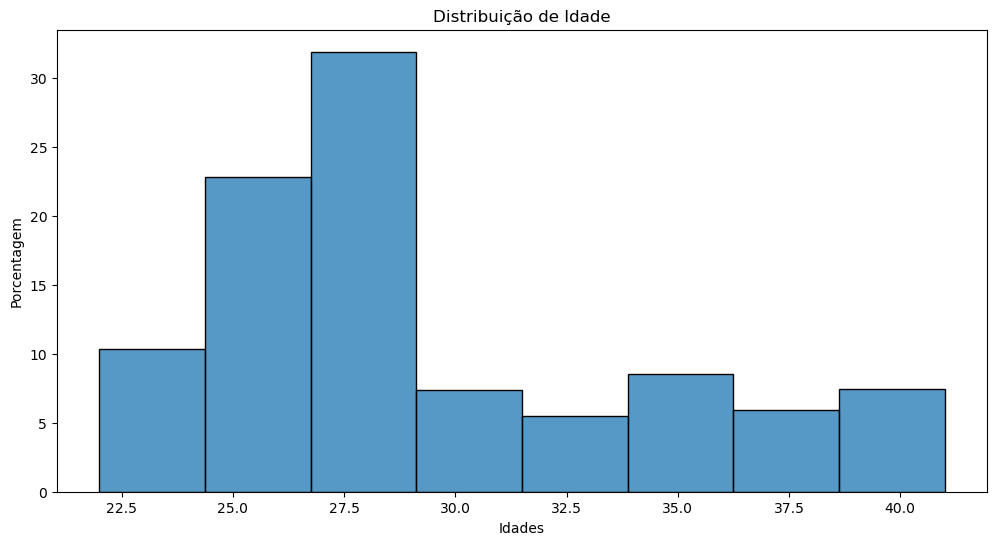

In [12]:
plt.figure(figsize=(12,6))
plt.title("Distribuição de Idade")
plt.xlabel('Idades')
plt.ylabel("Porcentagem")
sns.histplot(x= df.Age,bins=8, stat='percent')

**Diversidade Etária**: A distribuição mostra uma ampla variedade de idades, abrangendo desde 22 até 41 anos, o que indica que a força de trabalho é composta por indivíduos de diferentes faixas etárias.

**Concentração em Faixas Etárias**: A maior concentração de idades entre os funcionários estão na faixa de 20 a 30 anos. Isso evidência que a empresa tem uma concentração significativa de funcionários nessa faixa etária.

**Baixa Representatividade em Idades Mais Avançadas**: À medida que as idades aumentam, a representatividade de funcionários diminui. Por exemplo, há uma diminuição significativa no número de funcionários com mais de 30 anos.

**Possível Efeito Geracional**: A concentração em faixas etárias mais jovens pode indicar uma empresa que está atraindo e retendo mais funcionários jovens ou que está experimentando um rápido crescimento.

**Estratégia de Contratação**: A distribuição de idades pode fornecer informações sobre a estratégia de contratação da empresa e se ela está focando em recrutar funcionários de faixas etárias específicas.

**Desenvolvimento de Carreira**: A empresa pode considerar estratégias de desenvolvimento de carreira que levem em conta a diversidade etária e as necessidades de funcionários em diferentes estágios de suas carreiras.

**Sucessão e Planejamento**: Essa distribuição também é importante para o planejamento de sucessão, à medida que funcionários mais jovens podem estar prontos para assumir papéis de liderança à medida que envelhecem.

Essas conclusões podem ser valiosas para a empresa ao tomar decisões sobre recrutamento, retenção, desenvolvimento de carreira e estratégias de gestão de recursos humanos. Também pode informar políticas de diversidade etária e programas de treinamento para atender às necessidades de uma força de trabalho diversificada em termos de idade.


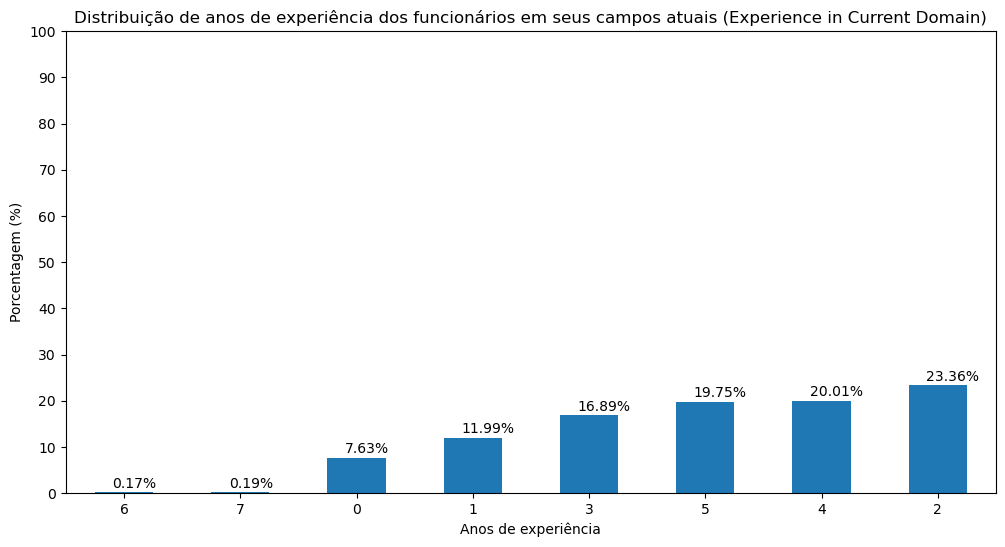

In [13]:
plt.figure(figsize=(12,6))
plt.title("Distribuição de anos de experiência dos funcionários em seus campos atuais (Experience in Current Domain)")
plt.xlabel('Anos de experiência')
plt.ylabel('Porcentagem (%)')

ax = (df.ExperienceInCurrentDomain.value_counts()/len(df)*100).sort_values().plot(kind = 'bar', rot = 0)
ax.set_yticks(np.arange(0,110,10))

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

- A distribuição dos anos de experiência dos funcionários em seus campos atuais (Experience in Current Domain) oferece insights sobre a experiência da força de trabalho. Aqui estão algumas conclusões que podem ser tiradas com base nessa distribuição:

**Variedade de Experiência**: A distribuição mostra uma variedade de níveis de experiência, com funcionários que têm desde 0 anos de experiência até 7 anos. Isso sugere que a força de trabalho é composta por indivíduos com diferentes níveis de experiência em suas áreas atuais.

**Experiência Inicial**: Uma parcela significativa dos funcionários (12%) tem apenas 1 ano de experiência em seus campos atuais. Isso pode indicar que a empresa contratou funcionários relativamente inexperientes ou que muitos funcionários estão em início de carreira.

**Experiência Média**: Funcionários com 2, 4 e 5 anos de experiência em seus campos são os mais numerosos, com um total de 23%, 20% e 19% funcionários, respectivamente. Isso sugere que a empresa possui uma base sólida de funcionários com experiência intermediária.

**Experiência Avançada**: Um número menor de funcionários que tem 6 e 7 anos de experiência, indicando que há alguns funcionários com níveis avançados de experiência em suas áreas.

**Potencial de Desenvolvimento**: A presença de funcionários com 0 anos de experiência pode indicar que a empresa também oferece oportunidades para aqueles que estão entrando pela primeira vez em suas áreas.

**Estratégia de Contratação**: A distribuição dos anos de experiência pode fornecer informações valiosas sobre a estratégia de contratação da empresa e se ela prefere contratar funcionários mais experientes ou investir no desenvolvimento de talentos menos experientes.

**Treinamento e Desenvolvimento**: A empresa pode considerar estratégias de treinamento e desenvolvimento para aumentar a experiência de seus funcionários e aprofundar seu conhecimento em suas áreas atuais.

Essas conclusões podem ser usadas para informar estratégias de gerenciamento de recursos humanos, planejamento de sucessão e desenvolvimento de carreira dentro da organização. Além disso, a empresa pode alinhar suas estratégias de contratação e treinamento com base nas necessidades identificadas na distribuição de anos de experiência.


<AxesSubplot:title={'center':'Distribuição do Ano de Admissão'}, xlabel='Ano de Admissão', ylabel='Quantidade de Admissões'>

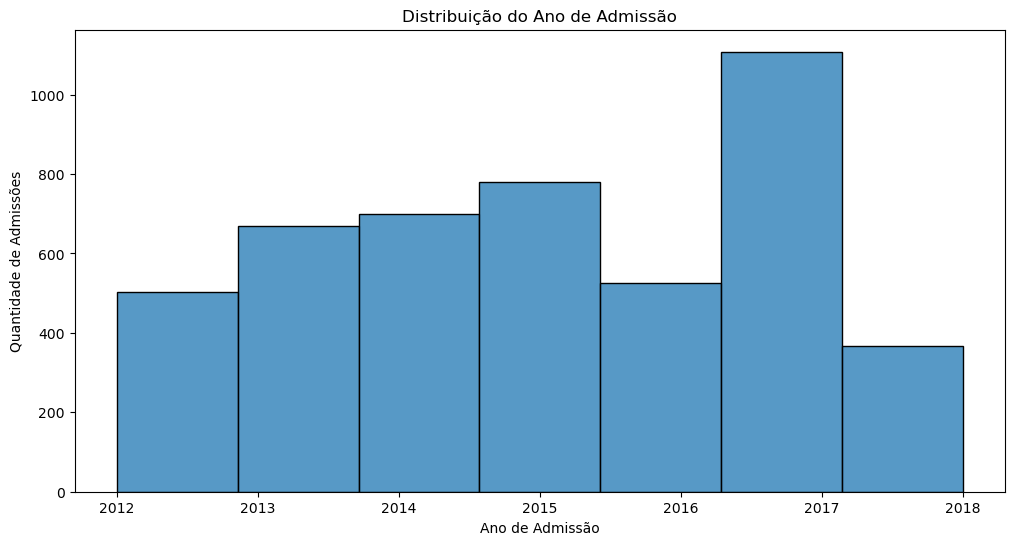

In [14]:
plt.figure(figsize=(12,6))
plt.title("Distribuição do Ano de Admissão")
plt.xlabel('Ano de Admissão')
plt.ylabel("Quantidade de Admissões")
sns.histplot(x= df.JoiningYear,bins=7, kde=False, )

**Taxa de Admissão**: A distribuição mostra que a empresa admitiu um grande número de funcionários no ano de 2017, com mais de 1000 novas contratações. Isso pode indicar um período de crescimento ou expansão da empresa naquele ano.

**Estabilidade**: A distribuição mostra que alguns funcionários têm uma longa permanência na empresa, indicada pelos anos de admissão em 2012, 2013, 2014 e 2015. Isso sugere que a empresa pode ter uma base estável de funcionários de longa data.

**Anos Mais Recentes**: Embora a admissão em 2017 seja alta, os números diminuem para 2016 e ainda mais para 2018. Isso pode indicar uma tendência de diminuição nas contratações nos anos mais recentes.

**Análise Temporal**: Podemos realizar uma análise temporal mais detalhada para entender as razões por trás das flutuações nas contratações ao longo dos anos. Por exemplo, o que aconteceu em 2017 para justificar o aumento nas contratações?

**Sucessão e Planejamento**: A distribuição dos anos de admissão é importante para o planejamento de sucessão, uma vez que funcionários com mais anos de serviço podem estar prontos para assumir papéis de liderança à medida que outros se aposentam.

**Estratégia de Recrutamento**: Os anos de admissão podem indicar a eficácia da estratégia de recrutamento da empresa em diferentes anos e ajudar a planejar futuras estratégias de recrutamento com base nas tendências históricas.

**Retenção de Funcionários**: É importante considerar a relação entre os anos de admissão e a retenção de funcionários. Funcionários admitidos em anos mais antigos podem ter maior probabilidade de permanecer na empresa a longo prazo.

Essas conclusões podem ser usadas para orientar estratégias de recursos humanos, planejamento de pessoal e desenvolvimento de carreira dentro da empresa.

([<matplotlib.patches.Wedge at 0x14615d76970>,
 [Text(-0.5181883220594831, 0.9702993676598876, '0'),
  Text(0.518188231213498, -0.9702994161761753, '1')],
 [Text(-0.2826481756688089, 0.5292542005417568, '65.6%'),
  Text(0.2826481261164534, -0.5292542270051864, '34.4%')])

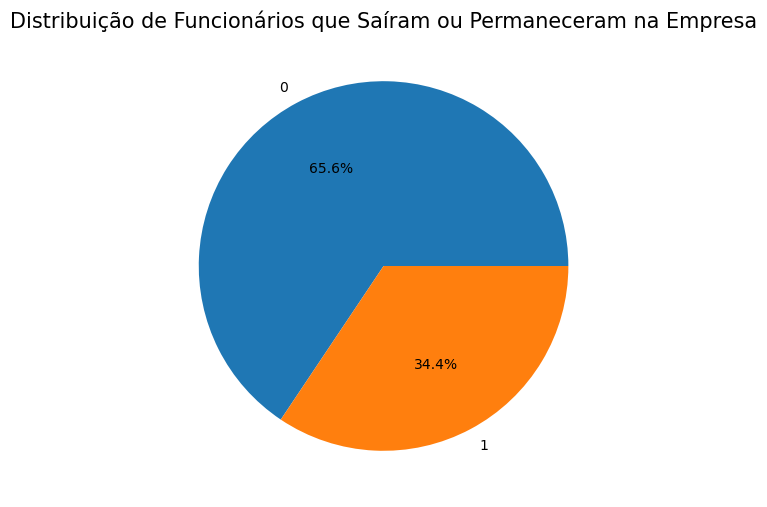

In [15]:
plt.figure(figsize=(12,6))
plt.title("Distribuição de Funcionários que Saíram ou Permaneceram na Empresa", fontsize = 15)

plt.pie(x=df.LeaveOrNot.value_counts(), labels = df.LeaveOrNot.value_counts().index, autopct = '%1.1f%%')

**Taxa de Retenção e Churn**: O dataset revela uma taxa de retenção (funcionários que permaneceram na empresa) de 66% funcionários e uma taxa de churn (funcionários que saíram) de 34% funcionários. Isso sugere que, durante o período abrangido pelo conjunto de dados, um número significativo de funcionários deixou a empresa.

**Desafio de Retenção**: A alta taxa de churn pode indicar um desafio na retenção de funcionários, o que pode ser preocupante para a empresa. É importante investigar os motivos pelos quais os funcionários estão saindo e implementar estratégias para melhorar a retenção de talentos.

**Análise de Custos**: A saída de funcionários pode resultar em custos significativos para a empresa, incluindo custos de recrutamento e treinamento de novos funcionários. Portanto, entender as razões por trás do churn e trabalhar na redução dessas taxas pode ser benéfico financeiramente.

**Políticas de RH**: A empresa deve revisar suas políticas de recursos humanos, processos de saída e estratégias de retenção para garantir que estejam alinhadas com as necessidades e expectativas dos funcionários. Identificar os fatores que levam ao churn é fundamental para a implementação de políticas eficazes.

**Previsão e Modelagem**: Com esses dados, é possível criar modelos de previsão que ajudem a identificar funcionários em risco de sair da empresa. Isso permite que a empresa tome medidas proativas para reter esses funcionários valiosos.

Em resumo, os dados indicam que a retenção de funcionários é uma área que requer atenção e ação por parte da empresa. Compreender as causas do churn e implementar estratégias eficazes de retenção pode ter um impacto positivo na estabilidade da força de trabalho e no desempenho geral da organização.

Encerramos aqui a análise individual das colunas do nosso conjunto de dados, o que nos forneceu insights valiosos sobre cada variável em seu contexto. Agora, estamos prontos para avançar para a próxima etapa: a análise bivariada.

A análise bivariada envolve a exploração das relações entre duas variáveis, permitindo-nos entender como elas se influenciam mutuamente. Essa fase é crucial para a compreensão mais profunda dos dados, pois nos ajuda a responder a perguntas como:

- Existe uma correlação entre a experiência no domínio atual e o nível de pagamento?
- A cidade de trabalho influencia a probabilidade de um funcionário sair ou não?
- A idade e a experiência no domínio atual estão relacionadas?

<div style="text-align: center;">
    <h2>Análise Bivariada</h2>
    
A análise bivariada nos permite identificar tendências, padrões e relações que podem não ser aparentes na análise individual das variáveis. Isso é fundamental para obter insights mais abrangentes e embasar a tomada de decisões informadas.

Além disso, a análise bivariada também nos prepara para análises multivariadas mais complexas, onde consideramos múltiplas variáveis ao mesmo tempo.

Portanto, avançaremos com a análise bivariada para explorar as relações entre as variáveis e buscar respostas para perguntas mais complexas que podem ser cruciais para o entendimento e a tomada de decisões relacionadas aos dados.

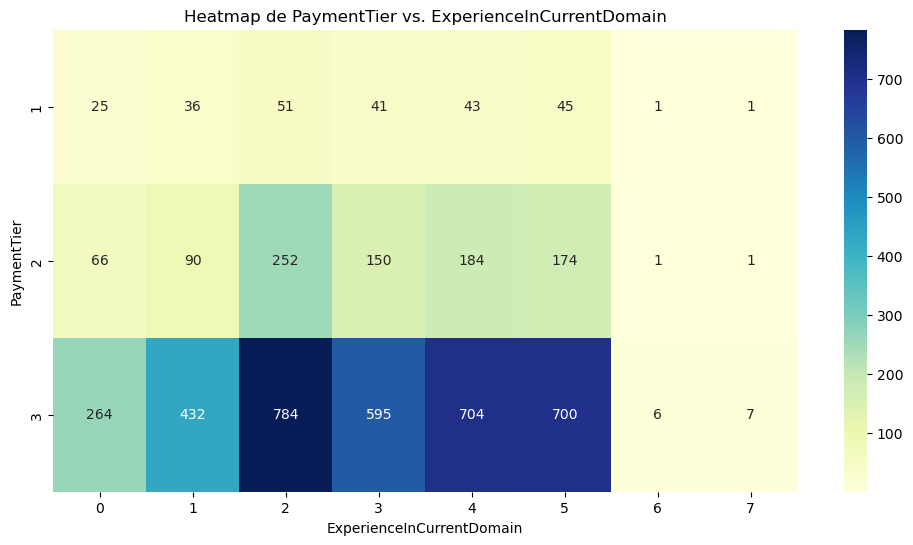

In [16]:
# Crie uma matriz de pivotagem das colunas de interesse
pivot_df = df.pivot_table(index='PaymentTier', columns='ExperienceInCurrentDomain', aggfunc='size')

# Crie o heatmap usando o Seaborn
plt.figure(figsize=(12, 6))  # Ajuste o tamanho da figura conforme necessário
sns.heatmap(pivot_df, annot=True, fmt="d", cmap="YlGnBu")  # "annot=True" mostra os valores nas células, "fmt="d"" formata os valores como inteiros
plt.title("Heatmap de PaymentTier vs. ExperienceInCurrentDomain")
plt.xlabel("ExperienceInCurrentDomain")
plt.ylabel("PaymentTier")
plt.show()

Ao cruzar as variáveis "PaymentTier" e "ExperienceInCurrentDomain" e criar uma tabela de contingência, podemos observar como a categoria de pagamento ("PaymentTier") está relacionada com a experiência no domínio atual ("ExperienceInCurrentDomain"). Aqui estão algumas conclusões que podemos tirar com base nos números apresentados:

**Distribuição dos Funcionários**: Podemos ver a distribuição de funcionários em diferentes níveis de pagamento ("PaymentTier") em relação à sua experiência no domínio atual. Por exemplo, há mais funcionários com experiência "0" no "PaymentTier" 3 do que em qualquer outro "PaymentTier".

**Aumento com a Experiência**: Em geral, parece haver um aumento na proporção de funcionários nos "PaymentTiers" mais altos à medida que sua experiência no domínio atual aumenta. Isso sugere que funcionários com mais experiência podem estar recebendo salários mais altos.

**Exceções nas Categorias Menos Comuns**: Nas categorias menos comuns, como "PaymentTier" 1 e 2 para funcionários com experiência "6" e "7", há um número muito pequeno de funcionários. Isso pode ser devido a casos atípicos ou erros nos dados.

**Experiência Baixa e Pagamento Mais Baixo**: Para funcionários com experiência "0" e "1", a maioria está no "PaymentTier" 3. Isso pode indicar que funcionários com pouca experiência tendem a receber salários mais baixos.

Há casos curiosos, como a observação de 25 casos em que funcionários têm "ExperienceInCurrentDomain" igual a 0 e "PaymentTier" igual a 1, que é o nível mais alto de pagamento, é interessante e pode indicar algumas possíveis conclusões:

**Treinamento ou Educação Específica**: Pode haver casos em que funcionários com pouca ou nenhuma experiência prévia no domínio atual possuam qualificações excepcionais, certificados de treinamento ou educação que os colocaram em um nível de pagamento mais alto. Isso pode ser especialmente relevante em campos onde habilidades técnicas específicas são altamente valorizadas.

**Política de Remuneração Diferenciada**: A empresa pode ter uma política de remuneração que recompensa fortemente novos talentos ou contratações iniciais que possuam habilidades críticas para o sucesso em suas funções, mesmo que tenham menos experiência.

**Erros ou Outliers nos Dados**: Como 25 casos podem ser relativamente poucos em comparação com o tamanho do conjunto de dados completo, também é importante considerar a possibilidade de erros nos dados ou outliers que estão distorcendo essa observação. É importante verificar a qualidade dos dados e investigar se esses casos são consistentes com a política de pagamento da empresa.

**Mérito Individual**: Pode ser que esses funcionários tenham demonstrado mérito excepcional em suas funções, mesmo com pouca experiência no domínio atual, justificando um nível de pagamento mais alto. Isso pode ser resultado de realizações significativas, como projetos bem-sucedidos ou habilidades raras.

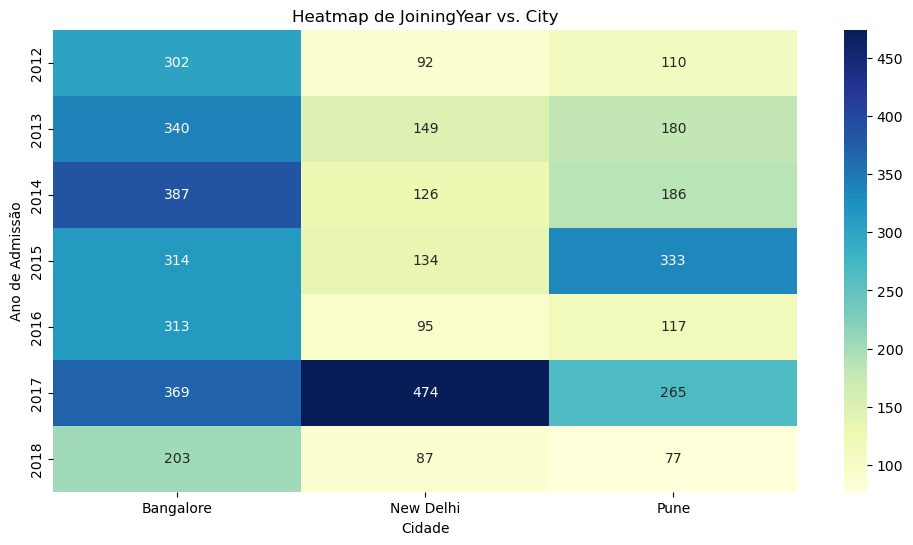

In [17]:
# Crie uma matriz de pivotagem das colunas de interesse
pivot_df = df.pivot_table(index='JoiningYear', columns='City', aggfunc='size')

# Crie o heatmap usando o Seaborn
plt.figure(figsize=(12, 6))  # Ajuste o tamanho da figura conforme necessário
sns.heatmap(pivot_df, annot=True, fmt="d", cmap="YlGnBu")  # "annot=True" mostra os valores nas células, "fmt="d"" formata os valores como inteiros
plt.title("Heatmap de JoiningYear vs. City")
plt.xlabel("Cidade")
plt.ylabel("Ano de Admissão")
plt.show()

A heatmap que relaciona o "JoiningYear" (ano de ingresso) e a "City" (cidade) dos funcionários fornece informações sobre como a distribuição dos funcionários que ingressaram em diferentes anos varia entre as cidades. Aqui estão algumas conclusões que podem ser tiradas são:

**Distribuição de Ingresso**: Você pode observar como o ingresso de funcionários se distribuiu ao longo dos anos em diferentes cidades. Por exemplo, há um aumento notável no número de funcionários que ingressaram em Bangalore em 2014, enquanto em New Delhi esse aumento ocorreu em 2017.

**Expansão da Empresa**: Variações na distribuição podem sugerir momentos de expansão da empresa em determinadas cidades. Por exemplo, o aumento no número de funcionários em New Delhi em 2017 pode indicar uma expansão significativa da equipe nessa cidade naquele ano.

**Diferenças Regionais**: As diferenças na distribuição entre as cidades podem refletir características regionais, como a demanda por mão de obra em uma cidade específica em um determinado ano.

**Recrutamento e Estratégia de Negócios**: Esses dados podem ser usados para avaliar a estratégia de recrutamento da empresa ao longo do tempo e em diferentes localizações. Por exemplo, a empresa pode ter intensificado o recrutamento em uma cidade específica em resposta a oportunidades de negócios ou necessidades específicas do mercado.

**Possíveis Insights**: Além dessas conclusões gerais, análises mais aprofundadas podem revelar insights específicos sobre as estratégias de crescimento da empresa, demanda por talentos em diferentes locais e como esses fatores podem estar relacionados ao sucesso da empresa em diferentes cidades.

É importante considerar esses resultados em conjunto com outras informações disponíveis sobre a empresa e o mercado para obter uma compreensão completa do contexto por trás desses números e usar esses insights para tomar decisões informadas.

<AxesSubplot:xlabel='PaymentTier', ylabel='count'>

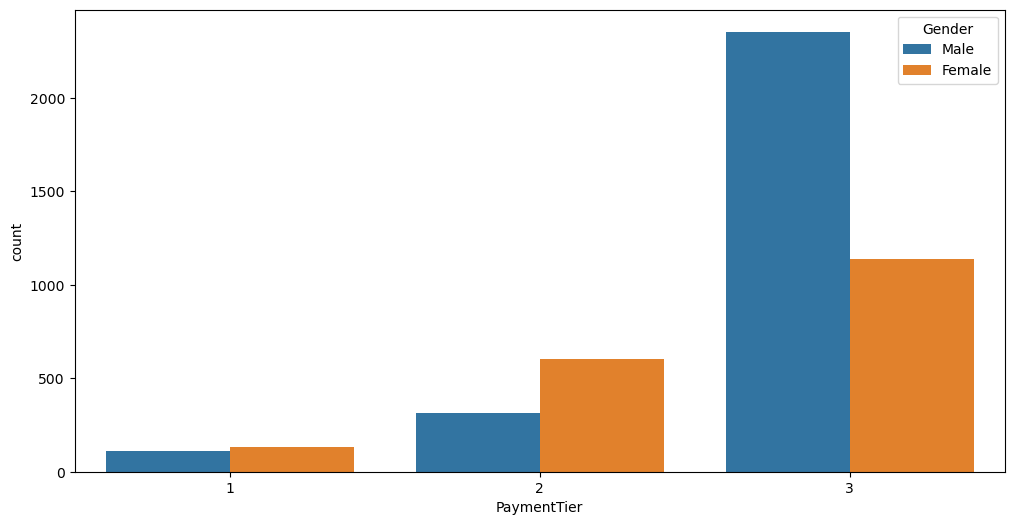

In [18]:
plt.figure(figsize=(12,6))

sns.countplot(x= df.PaymentTier, hue = df.Gender)

A gráfico que relaciona o "PaymentTier" (categoria de pagamento) com o "Gender" (gênero) dos funcionários fornece informações sobre como a distribuição de pagamento varia entre gêneros diferentes. Aqui estão algumas conclusões que podem ser tiradas:

**Disparidade de Pagamento**: A tabela mostra claramente uma disparidade de pagamento entre gêneros. Por exemplo, o número de funcionárias (Female) em "PaymentTier" 3 é significativamente maior do que em "PaymentTier" 1, o que pode indicar uma disparidade salarial.

**Equilíbrio de Gênero**: A distribuição de gênero em diferentes categorias de pagamento também varia. Por exemplo, há um número considerável de funcionárias (Female) em "PaymentTier" 3, mas relativamente poucas em "PaymentTier" 1, enquanto o gênero masculino (Male) é mais representado em "PaymentTier" 1.

**Análise de Disparidade de Gênero**: Esses dados podem ser usados para realizar uma análise mais aprofundada da disparidade de gênero no pagamento dentro da empresa. Pode ser necessário investigar as razões por trás dessas diferenças e considerar medidas para promover a igualdade salarial.

**Estratégias de Recursos Humanos**: A empresa pode usar esses dados para avaliar e ajustar suas estratégias de recursos humanos e políticas de pagamento, visando garantir uma distribuição mais equitativa dos salários entre gêneros.

É importante observar que essas conclusões iniciais são com base na distribuição de contagens e não levam em consideração outras variáveis que podem influenciar a disparidade salarial, como experiência, cargo ou cargo. Uma análise mais profunda, incluindo variáveis adicionais, pode ser necessária para entender completamente as causas da disparidade salarial.

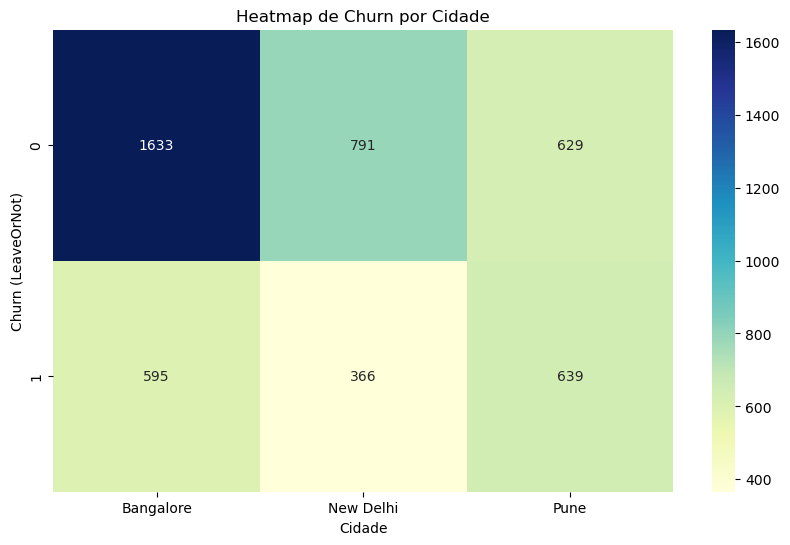

In [19]:
# Crie uma matriz de pivotagem das colunas de interesse
pivot_df = df.pivot_table(index='LeaveOrNot', columns='City', aggfunc='size')

# Crie o heatmap usando o Seaborn
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
sns.heatmap(pivot_df, annot=True, fmt="d", cmap="YlGnBu")  # "annot=True" mostra os valores nas células, "fmt="d"" formata os valores como inteiros
plt.title("Heatmap de Churn por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Churn (LeaveOrNot)")
plt.show()

No heatmap entre as variáveis "City" e "LeaveOrNot," podemos tirar as seguintes conclusões:

- **Distribuição por Cidade**: A tabela mostra a distribuição dos funcionários entre as cidades Bangalore, New Delhi e Pune.

**Churn por Cidade**: Podemos ver que a cidade de Bangalore tem o maior número de funcionários que permaneceram na empresa (0) com 1.633 funcionários e também um número significativo de funcionários que saíram (1) com 595 funcionários. Isso pode ser atribuído ao fato de Bangalore ser uma área de grande atividade empresarial.

**Churn em New Delhi**: New Delhi tem um número menor de funcionários em comparação com Bangalore, mas também mostra uma tendência de churn (funcionários que saíram) com 366 funcionários saindo e 791 permanecendo.

**Pune**: Pune apresenta uma situação interessante, com 629 funcionários que permaneceram e 639 funcionários que saíram. Isso indica que Pune tem uma taxa de churn relativamente alta em comparação com o número total de funcionários.

**Desafio de Retenção por Cidade**: Com base nessas informações, podemos concluir que a retenção de funcionários pode ser um desafio em todas as três cidades, com diferentes graus de impacto. A cidade de Pune, em particular, pode precisar de atenção para melhorar a retenção de funcionários.

**Tomada de Decisão**: Essas informações são valiosas para a tomada de decisão estratégica em recursos humanos. A empresa pode considerar implementar estratégias de retenção de talentos específicas para cada cidade, com base nas tendências observadas.

Em resumo, a análise das taxas de churn por cidade pode ajudar a empresa a identificar áreas onde a retenção de funcionários é mais crítica e onde podem ser necessárias ações específicas para melhorar a satisfação e a retenção dos funcionários.






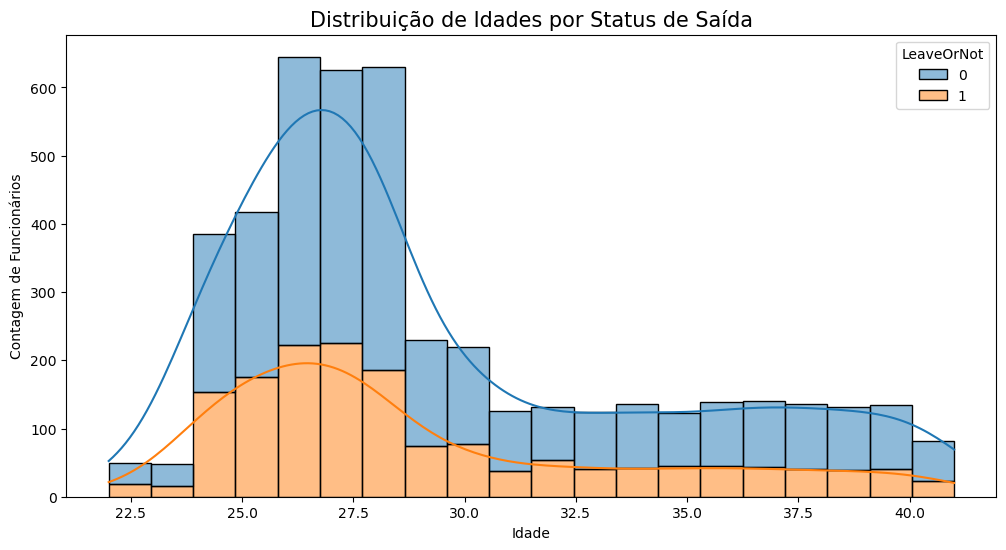

In [20]:
plt.figure(figsize=(12, 6))  # Ajuste o tamanho da figura conforme necessário
sns.histplot(data=df, x=df["Age"],hue="LeaveOrNot", kde=True, bins=20, multiple="stack")
plt.title('Distribuição de Idades por Status de Saída', fontsize = 15)
plt.xlabel('Idade')
plt.ylabel('Contagem de Funcionários')
plt.show()

Com base nesses dados, podemos tirar algumas conclusões:

**Distribuição das Idades**: Podemos ver como as idades estão distribuídas para os funcionários que permaneceram (LeaveOrNot = 0) e para aqueles que saíram (LeaveOrNot = 1) da empresa.

**Tendência por Idade**: Podemos observar que a maioria dos funcionários, tanto aqueles que permaneceram quanto aqueles que saíram, tem idades entre 24 e 28 anos. Isso sugere que a empresa pode ter uma força de trabalho mais jovem.

**Funcionários Mais Jovens**: Parece que a proporção de funcionários que saíram (LeaveOrNot = 1) é um pouco mais alta entre os funcionários mais jovens (idade 22 a 25) em comparação com os mais velhos.

**Variação nas Idades**: A variação nas idades parece ser maior entre os funcionários que permaneceram na empresa, com idades variando de 22 a 41 anos. Por outro lado, os funcionários que saíram tendem a ter idades mais concentradas nas faixas de 24 a 28 anos.

**Necessidade de Análise Adicional**: Essa análise inicial sugere que a idade pode desempenhar um papel na decisão de sair da empresa. No entanto, para obter insights mais profundos, é necessário realizar análises estatísticas, como testes de hipóteses, para determinar se há diferenças significativas nas idades entre os dois grupos (os que permaneceram e os que saíram).

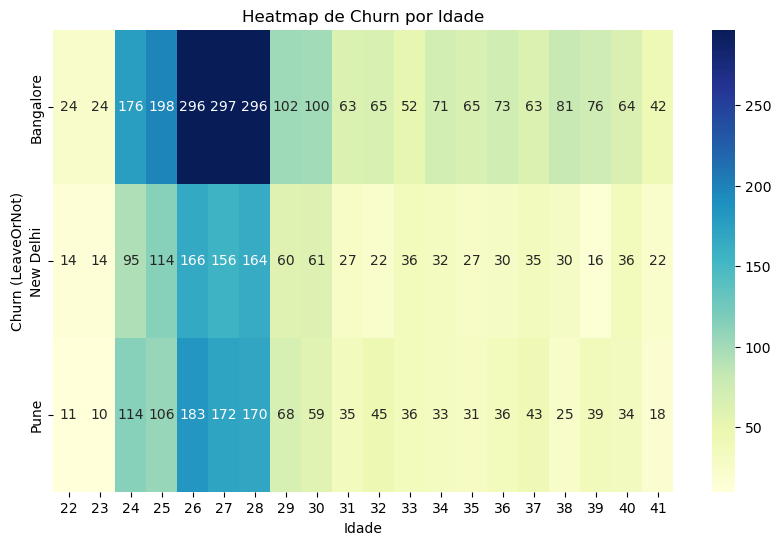

In [21]:
# Crie uma matriz de pivotagem das colunas de interesse
pivot_df = df.pivot_table(index='City', columns='Age', aggfunc='size')

# Crie o heatmap usando o Seaborn
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
sns.heatmap(pivot_df, annot=True, fmt="d", cmap="YlGnBu")  # "annot=True" mostra os valores nas células, "fmt="d"" formata os valores como inteiros
plt.title("Heatmap de Churn por Idade")
plt.xlabel("Idade")
plt.ylabel("Churn (LeaveOrNot)")
plt.show()

A distribuição das idades varia entre as cidades: Por exemplo, Bangalore tem uma população de funcionários mais jovem, enquanto New Delhi tem uma distribuição de idade mais uniforme. Pune, por sua vez, parece ter uma população de funcionários mais diversificada em termos de idade.

A cidade de Bangalore tem um grande número de funcionários mais jovens, com um pico em torno dos 26 anos. Isso pode indicar que Bangalore atrai talentos mais jovens.

As outras cidades também têm concentrações de funcionários em certas faixas etárias, mas essas faixas etárias variam de cidade para cidade.

A análise de dados mais aprofundada poderia ajudar a entender melhor a relação entre a idade dos funcionários e sua localização geográfica, talvez revelando tendências de recrutamento ou preferências demográficas nas diferentes cidades.

<div style="text-align: center;">
    <h3> Conclusões da Análise Exploratória de Dados </h3>
    
    
A análise exploratória nos forneceu informações valiosas sobre a composição da força de trabalho, distribuição de pagamento, diversidade de gênero e outros fatores. No entanto, essas conclusões iniciais são apenas o primeiro passo.
É importante lembrar que essa análise exploratória é uma base para análises mais aprofundadas e modelagem de dados. Mais investigações podem ser necessárias para compreender completamente os padrões e fatores subjacentes.
A partir dessa análise exploratória, podemos avançar para análises mais avançadas, como modelagem preditiva ou investigações adicionais para entender melhor os fatores que afetam o pagamento, a retenção de funcionários e outros aspectos importantes do negócio.
    
Durante a etapa de análise exploratória de dados, examinamos minuciosamente o conjunto de dados sobre os funcionários da empresa, abordando várias características demográficas e de emprego. Com base nas conclusões dessa análise, agora estamos prontos para dar o próximo passo: a modelagem preditiva.

<div style="text-align: center;">
    <h2> Modelagem Preditiva </h2>
    
    
**A Importância da Modelagem Preditiva**:
A modelagem preditiva é uma ferramenta poderosa que nos permite ir além da simples descrição dos dados e criar modelos matemáticos que podem fazer previsões com base nas informações disponíveis. No contexto deste conjunto de dados, a modelagem preditiva pode ser valiosa por vários motivos:

**Previsão de Retenção de Funcionários**: Podemos desenvolver modelos para prever a probabilidade de um funcionário sair da empresa (churn). Isso é crucial para a gestão de recursos humanos, permitindo que a empresa tome medidas proativas para reter talentos.

**Análise de Remuneração**: Modelos preditivos podem ajudar a entender os fatores que influenciam o pagamento dos funcionários. Isso pode incluir variáveis como educação, experiência e cidade. A empresa pode usar esses modelos para tomar decisões informadas sobre políticas salariais.

**Diversidade e Inclusão**: Podemos criar modelos para avaliar a diversidade de gênero e identificar tendências ao longo do tempo. Isso pode ser fundamental para as estratégias de inclusão.

**Gestão de Recursos**: A modelagem preditiva também pode ser usada para otimizar a alocação de recursos, como equipes de projetos, com base na experiência dos funcionários.

    
<h3> Como a Modelagem Preditiva Ajudará na Tomada de Decisão: </h3>
    

Através da modelagem preditiva, seremos capazes de antecipar eventos futuros, como a probabilidade de um funcionário deixar a empresa ou os fatores que mais impactam o pagamento.
Isso permitirá à empresa tomar medidas proativas para melhorar a retenção de funcionários, ajustar as políticas de pagamento, promover a diversidade de gênero e tomar decisões mais informadas em relação à gestão de recursos.
A análise preditiva também fornecerá uma base sólida para o planejamento estratégico, permitindo que a empresa esteja mais bem preparada para os desafios e oportunidades futuros.
Em resumo, a modelagem preditiva é uma ferramenta poderosa que transformará os dados em insights acionáveis, ajudando a empresa a tomar decisões mais informadas, aprimorar a gestão de recursos humanos e alcançar seus objetivos de negócios de forma mais eficaz.






In [22]:
# Agora vamos importar o Label Encoder que converte variáveis categóricas em valores numéricos para análise de máquina.
from sklearn.preprocessing import LabelEncoder

In [23]:
# Criando o objeto Label Encoder 
le = LabelEncoder()

# O código abaixo do scikit-learn para transformar a coluna 'Education' de variáveis categóricas
# (por exemplo, nomes de graus educacionais) em valores numéricos correspondentes.
# Cada categoria única recebe um valor inteiro único.
#Isso é útil para usar variáveis categóricas em algoritmos de machine learning que exigem entradas numéricas.

df['Education'] = le.fit_transform(df['Education'])

In [24]:
# Hora de verificar os resultados 
df.Education.tail()

4648    0
4649    1
4650    1
4651    0
4652    0
Name: Education, dtype: int32

In [25]:
# Agora iremos fazer o mesmo processo com as colunas City, Gender e EverBenched
df.City = le.fit_transform(df.City)
df.Gender = le.fit_transform(df.Gender)
df.EverBenched = le.fit_transform(df.EverBenched)

In [26]:
# Agora iremos averiguar os resultados da tabela por inteiro
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


Transformar variáveis categóricas em valores numéricos é crucial para modelagem preditiva, pois permite que algoritmos de machine learning processem e compreendam essas variáveis. Isso amplia a gama de algoritmos que podem ser aplicados e melhora a precisão dos modelos, tornando-os mais eficazes na tomada de decisões com base em dados do mundo real. A codificação numérica preserva a informação essencial das variáveis categóricas, tornando-as mais úteis para análises estatísticas e predições.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Education                  4653 non-null   int32
 1   JoiningYear                4653 non-null   int64
 2   City                       4653 non-null   int32
 3   PaymentTier                4653 non-null   int64
 4   Age                        4653 non-null   int64
 5   Gender                     4653 non-null   int32
 6   EverBenched                4653 non-null   int32
 7   ExperienceInCurrentDomain  4653 non-null   int64
 8   LeaveOrNot                 4653 non-null   int64
dtypes: int32(4), int64(5)
memory usage: 254.6 KB


In [28]:
df['Education'] = pd.Int64Dtype().type(df['Education'])
df['City'] = pd.Int64Dtype().type(df['City'])
df['Gender'] = pd.Int64Dtype().type(df['Gender'])
df['EverBenched'] = pd.Int64Dtype().type(df['EverBenched'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Education                  4653 non-null   int64
 1   JoiningYear                4653 non-null   int64
 2   City                       4653 non-null   int64
 3   PaymentTier                4653 non-null   int64
 4   Age                        4653 non-null   int64
 5   Gender                     4653 non-null   int64
 6   EverBenched                4653 non-null   int64
 7   ExperienceInCurrentDomain  4653 non-null   int64
 8   LeaveOrNot                 4653 non-null   int64
dtypes: int64(9)
memory usage: 327.3 KB


In [30]:
# Agora iremos separar o nosso alvo do resto do dataset
target = [ 'LeaveOrNot']
x = df.drop(columns= target)
y = df.LeaveOrNot

In [31]:
# Verificando X e Y pra ver se está tudo certo
x.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2
3,1,2016,0,3,27,1,0,5
4,1,2017,2,3,24,1,1,2


In [32]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: LeaveOrNot, dtype: int64

Agora vamos dividir os dados em conjuntos de treino e teste, que é uma etapa crítica no desenvolvimento de modelos de machine learning. Isso permite avaliar a capacidade do modelo de generalizar para novos dados e tomar decisões informadas sobre seu desempenho e ajuste.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .3)

In [35]:
print('Tamanho de X_train: ', x_train.shape)
print('Tamanho de X_test: ', x_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (3257, 8)
Tamanho de X_test:  (1396, 8)
Tamanho de y_train:  (3257,)
Tamanho de y_test:  (1396,)


In [36]:
# Agora iremos importar os algoritmos
# Importando os algoritmos
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [37]:
# E instancia-los 
tree = DecisionTreeClassifier()
svm = LinearSVC()
nb = GaussianNB()
mlp = MLPClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()

In [38]:
# Treinando os modelos com seus parâmetros padroes
tree.fit(x_train, y_train)
svm.fit(x_train, y_train)
nb.fit(x_train, y_train)
mlp.fit(x_train, y_train)
rf.fit(x_train, y_train)
lr.fit(x_train, y_train)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
# Importando métricas de avaliação
from sklearn.metrics import accuracy_score

Agora os algoritmos irão fazer previsões e iremos averiguar respectivamente às performances da Árvore de Decisão, SVM, Naive Bayes, MLP, Random Forest e Regressão Logística

In [40]:
y_pred_tree = tree.predict(x_test)
accuracy_score(y_test, y_pred_tree)

0.8123209169054442

In [41]:
y_pred_svm = svm.predict(x_test)
accuracy_score(y_test, y_pred_svm)

0.6540114613180515

In [42]:
y_pred_nb = nb.predict(x_test)
accuracy_score(y_test, y_pred_nb)

0.6905444126074498

In [43]:
y_pred_mlp = mlp.predict(x_test)
accuracy_score(y_test, y_pred_mlp)

0.7055873925501432

In [44]:
y_pred_rf = rf.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.8287965616045845

In [45]:
y_pred_lr = lr.predict(x_test)
accuracy_score(y_test, y_pred_lr)

0.7012893982808023

Com base nos resultados de desempenho dos modelos de machine learning com os parâmetros padrões, podemos tirar algumas conclusões iniciais:

**Melhor Desempenho**: Os modelos de Árvore de Decisão e Random Forest apresentaram o melhor desempenho, com pontuações de precisão (ou outra métrica de avaliação) mais altas em relação aos outros modelos.

**Variação no Desempenho**: Houve uma variação significativa no desempenho entre os modelos. O LinearSVC teve um desempenho relativamente mais baixo, enquanto o Random Forest teve um desempenho notavelmente bom.

**Modelos para Afinar**: Os modelos de Rede Neural (MLPClassifier) e Regressão Logística também tiveram um desempenho razoável, mas podem ser aprimorados por meio de ajuste de hiperparâmetros.

O próximo passo será o refinamento dos modelos. Podemos considerar as seguintes etapas:

- **Ajuste de Hiperparâmetros**: Vamos explorar diferentes combinações de hiperparâmetros para cada modelo. O ajuste de hiperparâmetros pode melhorar significativamente o desempenho do modelo.

- **Engenharia de Recursos**: Iremos considerar se há maneiras de criar novos recursos ou modificar os existentes para melhorar a capacidade preditiva dos modelos.

- **Validação Cruzada**: A validação cruzada será usada para avaliar o desempenho dos modelos de forma mais robusta e evitar overfitting.

- **Balanceamento de Classes**: Se o conjunto de dados tiver classes desequilibradas, aplicaremos técnicas de balanceamento de classes, como oversampling ou undersampling.

- **Seleção de Recursos**: Será considerado a seleção de recursos para identificar quais recursos têm maior importância na previsão.

- **Ensemble Learning**: Iremos experimentar técnicas de ensemble learning, como o aumento de gradiente (Gradient Boosting) ou o método de votação, para combinar vários modelos e melhorar o desempenho geral.

- **Avaliação Detalhada**: Além da precisão, avaliaremos outras métricas relevantes, como recall, F1-score e matriz de confusão, dependendo da natureza do problema.

- **Interpretação do Modelo**: Tentaremos entender como os modelos estão tomando decisões. Isso pode ajudar a identificar possíveis problemas e melhorar a confiabilidade do modelo.

<div style= "text-align:center;">
    <h3>Otimização do Modelo</h3>
    
    
A otimização do modelo desempenha um papel fundamental na análise de dados e no desenvolvimento de modelos de machine learning. Ela se concentra em melhorar a precisão, eficiência e desempenho dos modelos, tornando-os mais robustos e capazes de fornecer previsões mais confiáveis. A otimização do modelo é um processo contínuo e essencial na ciência de dados e na análise de dados. Ela visa aprimorar a qualidade das previsões, tornando os modelos mais eficientes, confiáveis e valiosos para uma ampla variedade de aplicações.
    

In [46]:
from sklearn.metrics import classification_report

In [47]:
y_train_true = y_train
y_train_pred = tree.predict(x_train)
y_test_true = y_test
y_test_pred = tree.predict(x_test)

print(f"Acurácia em Dados de Treino com Arvore de Decisão: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Arvore de Decisão: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Arvore de Decisão: 0.94

 ---------------------------

Acurácia em Dados de Teste com Arvore de Decisão: 0.81


In [48]:
print(classification_report(y_test_true, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       913
           1       0.75      0.69      0.72       483

    accuracy                           0.81      1396
   macro avg       0.80      0.78      0.79      1396
weighted avg       0.81      0.81      0.81      1396



In [49]:
y_train_true = y_train
y_train_pred = rf.predict(x_train)
y_test_true = y_test
y_test_pred = rf.predict(x_test)

print(f"Acurácia em Dados de Treino com Random Forest: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste Random Forest: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Random Forest: 0.94

 ---------------------------

Acurácia em Dados de Teste Random Forest: 0.83


In [50]:
print(classification_report(y_test_true, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       913
           1       0.79      0.69      0.74       483

    accuracy                           0.83      1396
   macro avg       0.82      0.80      0.80      1396
weighted avg       0.83      0.83      0.83      1396



**O desbalanceamento da classe alvo pode ter algo a ver com a baixa precisão do modelo?**

Sim, o desbalanceamento da classe alvo pode ter um impacto significativo na precisão do modelo, bem como em outras métricas de desempenho. O desbalanceamento ocorre quando uma classe tem muito mais exemplos do que a outra classe no conjunto de dados. Nesse contexto, parece que a classe 0 tem um suporte muito maior (921 exemplos) do que a classe 1 (475 exemplos) nos dados de teste.

O SMOTE (Synthetic Minority Over-sampling Technique) é uma técnica usada no campo de aprendizado de máquina e processamento de dados desbalanceados para lidar com problemas de desbalanceamento de classes. O desbalanceamento de classes ocorre quando uma classe tem muito mais exemplos do que outra classe em um conjunto de dados, o que pode levar a resultados de modelo enviesados e prejudicar o desempenho da classe minoritária.

O SMOTE resolve esse problema sintetizando exemplos adicionais para a classe minoritária, criando novos exemplos que são combinações ponderadas de exemplos existentes. Aqui está como o SMOTE funciona:

1. **Identificação dos Exemplos Minoritários:** Primeiro, o SMOTE identifica os exemplos da classe minoritária no conjunto de dados.

2. **Seleção de Exemplos Próximos:** Para cada exemplo da classe minoritária, o SMOTE seleciona k exemplos próximos (vizinhos) da mesma classe. A escolha de k é definida antecipadamente pelo usuário.

3. **Geração de Exemplos Sintéticos:** Para cada exemplo da classe minoritária, o SMOTE cria novos exemplos sintéticos. Cada novo exemplo sintético é criado tomando um exemplo original e adicionando uma fração ponderada da diferença entre esse exemplo e um dos exemplos selecionados aleatoriamente dos vizinhos.

O resultado é um conjunto de dados aumentado no qual a classe minoritária é equilibrada em relação à classe majoritária, tornando o modelo de aprendizado de máquina menos enviesado em relação à classe majoritária.

O SMOTE é uma técnica amplamente utilizada e eficaz para lidar com o desbalanceamento de classes em problemas de classificação. No entanto, deve ser usado com cuidado e consideração, pois a geração de exemplos sintéticos pode introduzir ruído nos dados, e a escolha adequada de k é importante para o desempenho do SMOTE. Além disso, existem várias variações do SMOTE, como o Borderline-SMOTE e o ADASYN, que abordam diferentes aspectos do problema de desbalanceamento de classes.

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
sm = SMOTE(sampling_strategy= 'minority',)

In [54]:
x_train_smote, y_train_smote= sm.fit_resample(x_train, y_train)

In [55]:
rf.fit(x_train_smote, y_train_smote)

RandomForestClassifier()

In [56]:
y_pred_rf = rf.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.7958452722063037

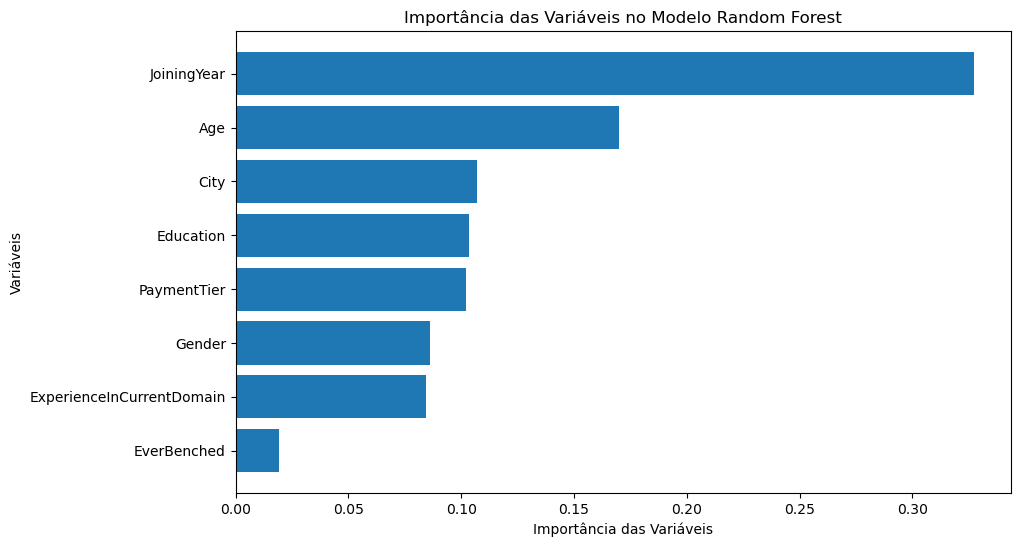

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Treine seu modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)  # Substitua X_train e y_train pelos seus próprios dados

# Obtenha as importâncias das variáveis a partir do modelo
importances = model.feature_importances_

# Obtenha os nomes das variáveis (nomes das colunas, por exemplo)
feature_names = x_train.columns  # Substitua X_train pelas suas próprias features

# Crie um índice classificado pelas importâncias das variáveis
sorted_index = np.argsort(importances)

# Crie um gráfico de barras das importâncias das variáveis
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_index)), importances[sorted_index], align='center')
plt.yticks(range(len(sorted_index)), [feature_names[i] for i in sorted_index])
plt.xlabel('Importância das Variáveis')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis no Modelo Random Forest')
plt.show()


In [60]:
importances[sorted_index]

array([0.01931233, 0.08458681, 0.08620434, 0.10224769, 0.10342295,
       0.10704782, 0.1700135 , 0.32716455])